<a href="https://colab.research.google.com/github/Chirag-Shilwant/Sentiment-Analysis-on-IMDB-Dataset/blob/main/Sentiment%20Analysis%20on%20IMDB%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_imbd = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv', na_values='?') 
dataset_imbd = dataset_imbd.reset_index(drop=True)

In [ ]:
dataset_imbd.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [ ]:
dataset_imbd['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [ ]:
print(dataset_imbd.shape)
dataset_imbd.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#train dataset
X = dataset_imbd.review
y = dataset_imbd.sentiment
print(X.shape, y.shape)

(50000,) (50000,)


In [ ]:
dataset_imbd.isnull().sum()

review       0
sentiment    0
dtype: int64

**Sample Review**

In [ ]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
import re
import os
import sys
import json
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup
import unicodedata
import en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer

def removeEmails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

def removeUrls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def removeRt(x):
	return re.sub(r'\brt\b', '', x).strip()

def removeSpecialChars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

def removeAccentedChars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

def removeStopwords(x):
	return ' '.join([t for t in x.split() if t not in stopwords])	

def removeDupsChar(x):
	x = re.sub("(.)\\1{2,}", "\\1", x)
	return x

def removeHTMLtags(x):
  return BeautifulSoup(x, 'lxml').get_text().strip()

In [ ]:
def dataClean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = removeHTMLtags(x)
    x = removeStopwords(x)
    x = removeEmails(x)
    x = removeUrls(x)
    x = removeRt(x)
    x = removeDupsChar(x)
    x = removeAccentedChars(x)
    x = removeSpecialChars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
print(dataClean(X[0]))

reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe thing struck oz brutality unflinching scenes violence set right word go trust me faint hearted timid pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements far awayi main appeal fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around episode saw struck nasty surreal couldnt ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order away it mannered middle class inmates turned prison bitches lack street skills p

In [ ]:
for i in range(len(X)):
  X[i] = dataClean(X[i])

In [ ]:
for sentiment in X[0:5]:
  print(sentiment)
  print("\n\n")

reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe thing struck oz brutality unflinching scenes violence set right word go trust me faint hearted timid pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements far awayi main appeal fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around episode saw struck nasty surreal couldnt ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order away it mannered middle class inmates turned prison bitches lack street skills p

In [ ]:
X

0        reviewers mentioned watching 1 oz episode youl...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment maltin one ...
49999    expects star trek movies high art fans expect ...
Name: review, Length: 50000, dtype: object

In [ ]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [ ]:
#split the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state = 45)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(35000,)
(35000,)
(15000,)
(15000,)


In [ ]:
X_train

9855     national lampoons dorm daze easily worst movie...
24367    carrot tops chairman board att commercials liv...
43552    like kinski great actor ive seen movie ive hea...
49483    got copy dvd disc set perfect found overall ex...
41722    movie rich action gore story line strong suppo...
                               ...                        
32469    definitely minority opinion one the hurt locke...
16317    friend gave boxed set 12 amazing scifihorror m...
12895    question immediately arises extremely idiosync...
6012     like jane austin novels love pride prejudice s...
6558     movie disaster disaster film great action scen...
Name: review, Length: 35000, dtype: object

In [ ]:
def get_sentiments(d, _d):
    positive = (d=="positive").sum()
    negative = (d=="negative").sum()
    print('Sentiments in {}:\n Positive: {}\n Negative: {}'.format(_d, positive, negative))

In [ ]:
get_sentiments(Y_train, 'Train data')
get_sentiments(Y_test, 'Test data')

Sentiments in Train data:
 Positive: 17494
 Negative: 17506
Sentiments in Test data:
 Positive: 7506
 Negative: 7494


# **Visualize Dataset**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

**WORD CLOUD OF POSITIVE WORDS**

<function matplotlib.pyplot.show>

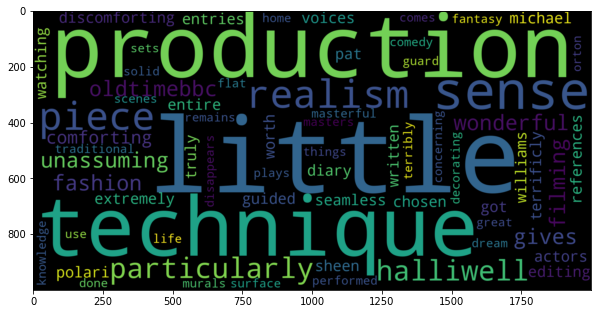

In [ ]:
plt.figure(figsize=(10,10))
positive_text=X[1]
WC=WordCloud(width=2000,height=1000,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**WORD CLOUD OF NEGATIVE WORDS**

<function matplotlib.pyplot.show>

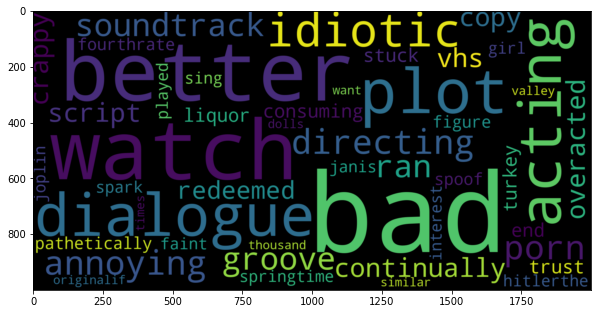

In [ ]:
plt.figure(figsize=(10,10))
negative_text=X[49996]
WC=WordCloud(width=2000,height=1000,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

# **Using Bag of Words**

In [ ]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
featureName = vectorizer.get_feature_names()
print("Number of features - ", len(featureName))
print("Last 30 features are\n", featureName[-30:])

Number of features -  174914
Last 30 features are
 ['zuluagain', 'zulunation', 'zungia', 'zuni', 'zuniga', 'zunigas', 'zuotian', 'zurer', 'zurers', 'zurich', 'zutaut', 'zuthe', 'zuwarriors', 'zuzuzz', 'zvezda', 'zvonimir', 'zvyagvatsev', 'zwart', 'zwartboek', 'zwarts', 'zweite', 'zwick', 'zwicks', 'zwrite', 'zx81', 'zy', 'zyada', 'zylbersteinand', 'zyuranger', 'zz']


In [ ]:
vectorizer.vocabulary_

{'national': 104673,
 'lampoons': 86962,
 'dorm': 45177,
 'daze': 38960,
 'easily': 47622,
 'worst': 172257,
 'movie': 102042,
 'seen': 135904,
 'ive': 81383,
 'kazaam': 84193,
 'reading': 125638,
 'thinks': 154837,
 'good': 65558,
 'way': 168021,
 'shape': 138138,
 'form': 59990,
 'idea': 76034,
 'is': 80282,
 'watch': 167659,
 'stupidits': 148355,
 'hard': 69596,
 'wrong': 172731,
 'off': 109125,
 'plot': 118398,
 'place': 117729,
 'cant': 25059,
 'follow': 59355,
 'multiple': 103304,
 'misunderstandings': 99912,
 'all': 7184,
 'acting': 4375,
 'awful': 13562,
 'least': 88211,
 'thing': 154630,
 'poorly': 119403,
 'made': 93048,
 'worked': 171824,
 'kid': 84723,
 'againit': 5951,
 'sum': 149332,
 'paragraph': 113891,
 'two': 160689,
 'bad': 14165,
 'want': 167116,
 'turn': 160251,
 'television': 152734,
 'usa': 163892,
 'better': 17756,
 'movies': 102471,
 'this': 154930,
 'friend': 61121,
 'carrot': 25863,
 'tops': 157757,
 'chairman': 27258,
 'board': 19765,
 'att': 12552,
 'commer

## **1. Multinomial Naive Baise**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print("Accuracy Score on Train", clf.score(X_train, Y_train))

Accuracy Score on Train 0.9250571428571429


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictNB = clf.predict(X_test)
print("Accuracy Score on Test", accuracy_score(Y_test, predictNB))

Accuracy Score on Test 0.8550666666666666


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictNB = clf.predict(X_test)
print("Accuracy Score on Test", accuracy_score(Y_test, predictNB))

Accuracy Score on Test 84.6516


In [ ]:
matrix = confusion_matrix(Y_test, predictNB)
print(matrix)

[[6495  999]
 [1175 6331]]


In [ ]:
print(classification_report(Y_test, predictNB))

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      7494
    positive       0.86      0.84      0.85      7506

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



AxesSubplot(0.125,0.125;0.62x0.755)


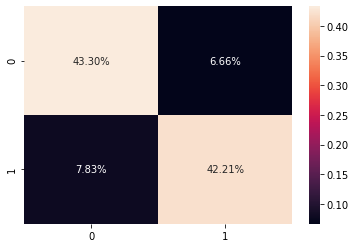

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

## **2. Gaussian Naive Bayes**

In [ ]:
print(X_train.shape)

(35000, 174914)


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
X_train = X_train.toarray()
for i in range (0,3600):
  clf.partial_fit(X_train[i*10:(i+1)*10],Y_train[i*10:(i+1)*10])

In [ ]:
print("Accuracy Score on Train", clf.score(X_train, Y_train))

Accuracy Score on Train 91.58065714285715


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictGB = clf.predict(X_test)
print("Accuracy Score on Test", accuracy_score(Y_test, predictGB))

Accuracy Score on Test 84.6516


In [ ]:
matrix = confusion_matrix(Y_test, predictGB)
print(matrix)

[[6495  999]
 [1175 6331]]


AxesSubplot(0.125,0.125;0.62x0.755)


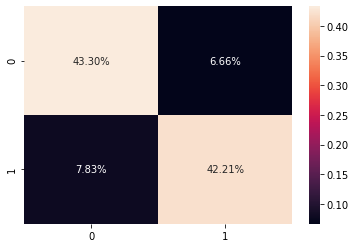

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

## **3. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
svmpolynomial = SVC(gamma = 0.1, kernel = 'poly', random_state = 45)
svmpolynomial.fit(X_train,Y_train)
labels_predict = svmpolynomial.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,labels_predict))

0.8336


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print("Confusion Matrix")
matrix = confusion_matrix(Y_test,labels_predict)
print(confusion_matrix(Y_test,labels_predict))

Confusion Matrix
[[5891 1603]
 [ 893 6613]]


In [ ]:
print("CLassification Report")
print(classification_report(Y_test, labels_predict))

Classifiction Report
              precision    recall  f1-score   support

    negative       0.87      0.79      0.83      7494
    positive       0.80      0.88      0.84      7506

    accuracy                           0.83     15000
   macro avg       0.84      0.83      0.83     15000
weighted avg       0.84      0.83      0.83     15000



AxesSubplot(0.125,0.125;0.62x0.755)


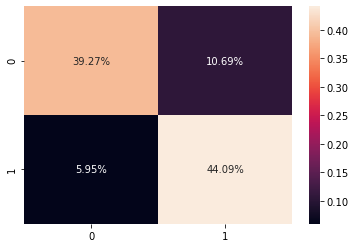

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

## **4. Decision Tree**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,y_pred))

0.734


In [ ]:
print("Confusion Matrix")
matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[5891 1603]
 [ 893 6613]]


In [ ]:
print("CLassification Report")
print(classification_report(Y_test, y_pred))

CLassification Report
              precision    recall  f1-score   support

    negative       0.73      0.74      0.74      7494
    positive       0.74      0.73      0.73      7506

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



AxesSubplot(0.125,0.125;0.62x0.755)


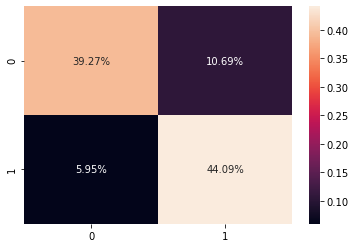

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

## **5. Maximum Entropy**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
maxent = linear_model.LogisticRegression(penalty = 'l2', C=1.0, max_iter=800)
maxent.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = maxent.predict(X_test)
print("Accuracy Score on Test", accuracy_score(Y_test,y_pred))

Accuracy Score on Test 0.8846


In [ ]:
print("Confusion Matrix")
matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[6578  916]
 [ 815 6691]]


In [ ]:
print("CLassification Report")
print(classification_report(Y_test, y_pred))

CLassification Report
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      7494
    positive       0.88      0.89      0.89      7506

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



AxesSubplot(0.125,0.125;0.62x0.755)


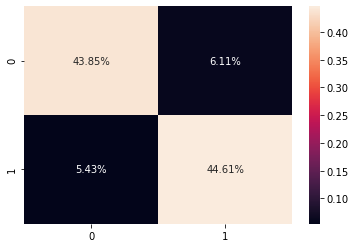

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

## **Hyperparameter Tuning on 2 best model**

### **Naive Bayes Optimization**

In [ ]:
alpha_ = [float(x) for x in np.linspace(start = 1, stop = 5, num = 10)]
random_grid = {'alpha': alpha_,
               'fit_prior': ['true', 'false']
              }

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
nb = MultinomialNB()
rf_randomcv=RandomizedSearchCV(estimator=nb,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [1.0, 1.4444444444444444,
                                                  1.8888888888888888,
                                                  2.333333333333333,
                                                  2.7777777777777777,
                                                  3.2222222222222223,
                                                  3.6666666666666665,
                                                  4.111111111111111,
                                                  4.555555555555555, 5.0],
                                        'fit_prior': ['true', 'false']},
                   pre_dispatch='2*n_jobs', random_state=100, refit=True,
                   return_train_score=False, scorin

In [ ]:
rf_randomcv.best_params_

{'alpha': 2.7777777777777777, 'fit_prior': 'true'}

In [ ]:
clf = rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictNB = clf.predict(X_test)
print("Accuracy Score on Test", accuracy_score(Y_test, predictNB))

Accuracy Score on Test 0.8542666666666666


In [ ]:
matrix = confusion_matrix(Y_test, predictNB)
print(matrix)

[[6473 1021]
 [1165 6341]]


### **ME opt**

In [ ]:
tol_ = [float(x) for x in np.linspace(start = 0.00001, stop = 0.0005, num = 10)]
verbose_ = [int(x) for x in np.linspace(start = 1, stop = 10, num = 1)]
random_state_ = [int(x) for x in np.linspace(start = 1, stop = 10, num = 1)]
C_ = [float(x) for x in np.linspace(start = 0.01, stop = 0.1, num = 10)]
max_iter_ = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
intercept_scaling_ = [float(x) for x in np.linspace(start = 1, stop = 5, num = 10)]
l1_ratio_ = [float(x) for x in np.linspace(start = 0, stop = 1, num = 10)]

random_grid1 = {'penalty':['l1', 'l2', 'none'],
                'tol':tol_,
                'C': C_,
                'max_iter': max_iter_,
                'intercept_scaling': intercept_scaling_,
                'class_weight':'balanced',
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'random_state':random_state_,
                'multi_class': ['auto', 'ovr', 'multinomial'],
                'verbose':verbose_,
                'l1_ratio': l1_ratio_
              }

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

me = linear_model.LogisticRegression()
rf_randomcv=RandomizedSearchCV(estimator=me,param_distributions=random_grid1,n_iter=100,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 13.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 18 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.5s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [...
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [1e-05, 6.444444444444444e-05,
 

In [ ]:
rf_randomcv.best_params_

{'C': 0.06000000000000001,
 'class_weight': 'n',
 'intercept_scaling': 4.111111111111111,
 'l1_ratio': 0.6666666666666666,
 'max_iter': 200,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'sag',
 'tol': 0.00011888888888888889,
 'verbose': 1}

In [ ]:
clf = rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictNB = clf.predict(X_test)
print("Accuracy Score on Test", accuracy_score(Y_test, predictNB))

Accuracy Score on Test 0.8888


In [ ]:
matrix = confusion_matrix(Y_test, predictNB)
print(matrix)

[[6593  901]
 [ 767 6739]]


# **Using Word2Vec**

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=398ac96d25a2824be10a5ff19ca43effc0de2f43d6a954f2c28625fd87d29c6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-imrswpu1/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_imbd = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv', na_values='?') 
dataset_imbd = dataset_imbd.reset_index(drop=True)

In [ ]:
dataset_imbd.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [ ]:
print(dataset_imbd.shape)
dataset_imbd.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
dataset_imbd['review'] = dataset_imbd['review'].apply(lambda x: dataClean(x))

In [ ]:
dataset_imbd.head(10)

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure like resurrection dated seahunt series te...,positive
7,amazing fresh innovative idea 70s aired 7 8 ye...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter like movi...,positive


In [ ]:
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

In [ ]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [ ]:
dataset_imbd['vec'] = dataset_imbd['review'].apply(lambda x: get_vec(x))

In [ ]:
dataset_imbd.head(10)

,review,sentiment,vec
0,reviewers mentioned watching 1 oz episode youl...,positive,"[-0.08648403, 0.06491846, -0.06025309, -0.0454..."
1,wonderful little production filming technique ...,positive,"[-0.03153765, 0.08566651, -0.041610494, 0.0076..."
2,thought wonderful way spend time hot summer we...,positive,"[-0.016099233, 0.10197374, -0.028735312, -0.10..."
3,basically theres family little boy jake thinks...,negative,"[-0.040155314, -0.019167345, -0.09651553, -0.0..."
4,petter matteis love time money visually stunni...,positive,"[0.0045765135, 0.09241039, -0.108158626, -0.10..."
5,probably alltime favorite movie story selfless...,positive,"[-0.08721831, 0.14089604, -0.052242003, -0.046..."
6,sure like resurrection dated seahunt series te...,positive,"[-0.030027747, 0.10627971, -0.07668429, -0.087..."
7,amazing fresh innovative idea 70s aired 7 8 ye...,negative,"[-0.06726362, 0.14709032, -0.036618788, -0.089..."
8,encouraged positive comments film looking forw...,negative,"[-0.08907281, 0.06900939, -0.060642082, -0.102..."
9,like original gut wrenching laughter like movi...,positive,"[-0.009328372, 0.10151131, -0.1637328, -0.0873..."


In [ ]:
X = dataset_imbd['vec'].to_numpy()
X = X.reshape(-1, 1)
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)
Y = dataset_imbd['sentiment']
print(X.shape, Y.shape)

(50000, 300) (50000,)


In [ ]:
#split the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 45, stratify = Y)

In [ ]:
X_train

array([[-0.00503179,  0.05165735, -0.00405053, ..., -0.01077633,
         0.04364449,  0.07400434],
       [-0.01619452,  0.04124891, -0.10208272, ..., -0.10940965,
         0.00814665,  0.0257794 ],
       [-0.03833186,  0.08911838, -0.0936385 , ...,  0.02506642,
         0.04823593,  0.05245833],
       ...,
       [-0.05682486, -0.00705045, -0.04737088, ..., -0.17241804,
         0.05473878,  0.1137126 ],
       [ 0.01256995,  0.08299407,  0.03736777, ..., -0.02662358,
        -0.07519144, -0.00937006],
       [-0.02495763,  0.1223387 , -0.0619137 , ..., -0.00100804,
         0.01360072,  0.05953594]], dtype=float32)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(35000, 300)
(35000,)
(15000, 300)
(15000,)


In [ ]:
get_sentiments(Y_train, 'Train data')
get_sentiments(Y_test, 'Test data')

Sentiments in Train data:
 Positive: 17500
 Negative: 17500
Sentiments in Test data:
 Positive: 7500
 Negative: 7500


##**1.Decision Tree**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,y_pred))

0.6904


In [ ]:
print("Confusion Matrix")
matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[5166 2334]
 [2310 5190]]


In [ ]:
print("CLassification Report")
print(classification_report(Y_test, y_pred))

CLassification Report
              precision    recall  f1-score   support

    negative       0.69      0.69      0.69      7500
    positive       0.69      0.69      0.69      7500

    accuracy                           0.69     15000
   macro avg       0.69      0.69      0.69     15000
weighted avg       0.69      0.69      0.69     15000



AxesSubplot(0.125,0.125;0.62x0.755)


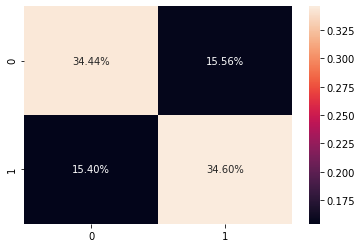

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

## **2.SVM**

In [ ]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
svmpolynomial = SVC(gamma = 0.1, kernel = 'poly', random_state = 45)
svmpolynomial.fit(X_train,Y_train)
labels_predict = svmpolynomial.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,labels_predict))

0.844602


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print("Confusion Matrix")
matrix = confusion_matrix(Y_test,labels_predict)
print(confusion_matrix(Y_test,labels_predict))

Confusion Matrix
[[6314 1186]
 [1017 6483]]


In [ ]:
print("CLassification Report")
print(classification_report(Y_test, labels_predict))

CLassification Report
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      7500
    positive       0.85      0.86      0.85      7500

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



AxesSubplot(0.125,0.125;0.62x0.755)


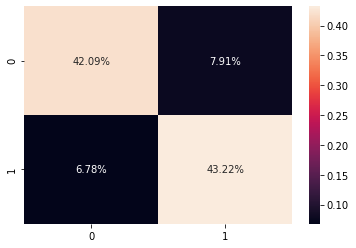

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

## **3. Maximum Entorpy**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
maxent = linear_model.LogisticRegression(penalty = 'l2', C=1.0, max_iter=800)
maxent.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = maxent.predict(X_test)
print("Accuracy Score on Test", accuracy_score(Y_test,y_pred))

Accuracy Score on Test 0.8509333333333333


In [ ]:
print("Confusion Matrix")
matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[6362 1138]
 [1098 6402]]


In [ ]:
print("CLassification Report")
print(classification_report(Y_test, y_pred))

CLassification Report
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7500
    positive       0.85      0.85      0.85      7500

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



AxesSubplot(0.125,0.125;0.62x0.755)


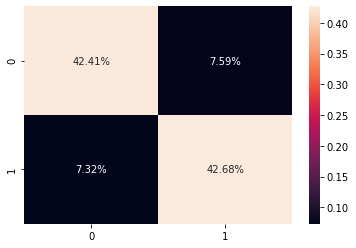

In [ ]:
print(sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%'))

# **Convolutional Neural Network**

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
# Pad the sequence to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [ ]:
# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 371s 945ms/step - loss: 0.5729 - accuracy: 0.7408
Epoch 2/3
391/391 [==============================] - 369s 944ms/step - loss: 0.1568 - accuracy: 0.9416
Epoch 3/3
391/391 [==============================] - 369s 945ms/step - loss: 0.0458 - accuracy: 0.9861


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.84%


# **ACCURACY SUMMARY USING BAG OF WORDS**

In [ ]:
import pandas as pd
data = {'MODEL':['MNB','GNB', 'DT', 'SVM', 'ME'  , 'CNN'],
        'ACCURACY':[85.42,84.6, 73.40, 83.36, 88.46,86.19],
        'Precision':[86,85.8,73,84,88,85],
        'Recall':[86,85.8,73,84,88,85],
        'F-Score':[86,85.6,73,84,88,85]}
df = pd.DataFrame(data)
df        

,MODEL,ACCURACY,Precision,Recall,F-Score
0,MNB,85.42,86.0,86.0,86.0
1,GNB,84.60,85.8,85.8,85.6
2,DT,73.40,73.0,73.0,73.0
3,SVM,83.36,84.0,84.0,84.0
4,ME,88.46,88.0,88.0,88.0
5,CNN,86.19,85.0,85.0,85.0


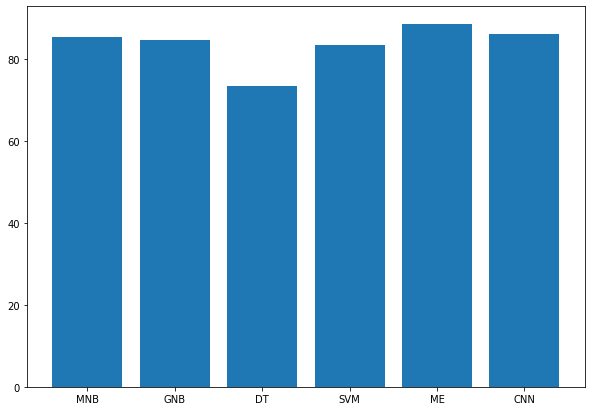

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
name = df['MODEL']
price = df['ACCURACY']
fig = plt.figure(figsize =(10, 7))
plt.bar(name[0:6], price[0:6])
plt.show()

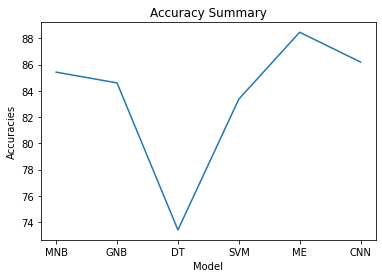

In [ ]:
import matplotlib.pyplot as plt 
x = name
y = price 
plt.plot(x, y) 
plt.xlabel('Model') 
plt.ylabel('Accuracies')
plt.title('Accuracy Summary')
plt.show() 

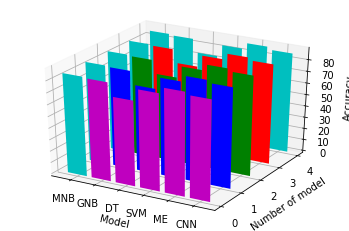

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['c','r', 'g', 'b', 'm']
yticks = [4,3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = name
    ys = price
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=1.0)

ax.set_xlabel('Model')
ax.set_ylabel('Number of model')
ax.set_zlabel('Accuracy')
ax.set_yticks(yticks)

plt.show()

# **Accuracy Summary using WORD2VEC**

In [ ]:
import pandas as pd
data = {'MODEL':[ 'DT', 'SVM', 'ME'  , 'CNN'],
        'ACCURACY':[69.04,84.6, 85.46,86.19],
        'Precision':[69.04,84.6, 85.46,85],
        'Recall':[69.04,84.6, 85.46,85],
        'F-Score':[69.04,84.6, 85.46,85]}
df = pd.DataFrame(data)
df        

,MODEL,ACCURACY,Precision,Recall,F-Score
0,DT,69.04,69.04,69.04,69.04
1,SVM,84.60,84.60,84.60,84.60
2,ME,85.46,85.46,85.46,85.46
3,CNN,86.19,85.00,85.00,85.00


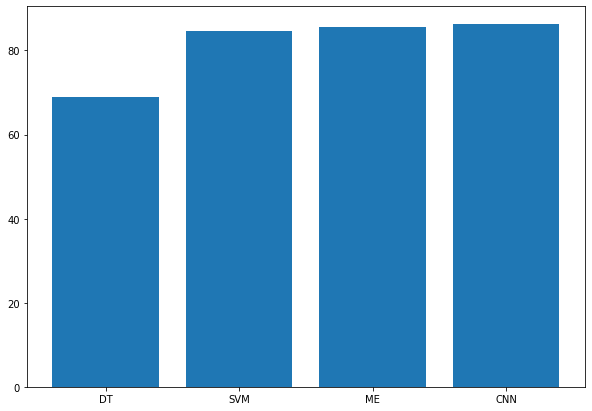

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
name = df['MODEL']
price = df['ACCURACY IN PERCENTAGE']
fig = plt.figure(figsize =(10, 7))
plt.bar(name[0:5], price[0:5])
plt.show()

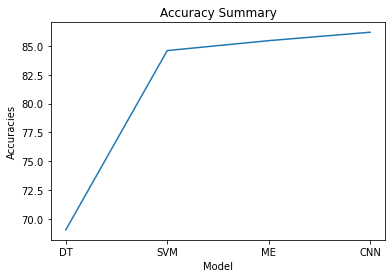

In [ ]:
import matplotlib.pyplot as plt 
x = name
y = price 
plt.plot(x, y) 
plt.xlabel('Model') 
plt.ylabel('Accuracies')
plt.title('Accuracy Summary')
plt.show() 

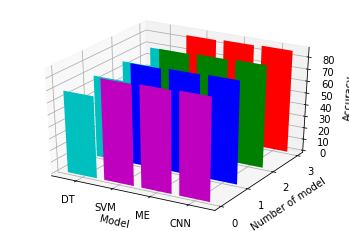

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'm']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = name
    ys = price
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=1.0)

ax.set_xlabel('Model')
ax.set_ylabel('Number of model')
ax.set_zlabel('Accuracy')
ax.set_yticks(yticks)

plt.show()